# 0 필요한 라이브러리 임포트

In [32]:
pip install pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-qdu7tivk/pytorch_efeb685a9d4c4310a7b8550bffa200cd/setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 필요한 라이브러리를 임포트합니다.
import pandas as pd  # 데이터 조작 및 분석을 위한 라이브러리
import numpy as np  # 수치 계산을 위한 라이브러리
import wfdb  # 심전도 데이터를 읽기 위한 라이브러리
import ast  # 문자열 형태의 파이썬 표현식을 파싱하기 위한 라이브러리
from tqdm import tqdm  # 반복 작업의 진행 상황을 시각적으로 표시하기 위한 라이브러리
import warnings; warnings.filterwarnings('ignore')  # 경고 메시지를 무시하기 위한 설정
from IPython.display import display  # Jupyter 노트북에서 데이터를 깔끔하게 보여주기 위한 함수
from glob import glob # 하위 디렉토리에 파일을 가져와서 다루기위한 라이브러리 
import os # 현재 워킹디렉토리의 경로와 파일을 다루기 위한 라이브러리 
import h5py #.h5파일을 다루기 위한 라이브러리 
import gc #가비치 컬렉터를 다루는 라이브러리

# 데이터 시각화를 위한 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt  # 그래프를 그리기 위한 라이브러리
import seaborn as sns  # matplotlib 기반의 고급 시각화 라이브러리

#머신러닝을 위한 scikit-learn 임포트 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [3]:
#파이토치에서 gpu를 사용할수 있는지 확인하기 
print(torch.cuda.is_available())

# 사용가능하다면 사용하기 
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

NameError: name 'torch' is not defined

# 1. eda
- 1-1 데이터 불러오기 및 변수 생성하기  

## 1-1 데이터 불러오기 및 변수 생성하기  

- df_ptb: ptb메타 데이터 
- df_sph: sph 메타데이터 
- df_ptb_lead1: ptb-xl lead1 데이터 
- df_sph_lead1: sph lead1 데이터

In [4]:
os.getcwd()

'/root/harbud/ecg'

In [5]:
# 데이터 프레임 로드
path = './ptb_xl_data/'
df_ptb = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')

# 파일 이름 리스트 변환
filenames = df_ptb['filename_hr'].tolist()
base_path = './ptb_xl_data/'

# Lead I 신호를 저장할 배열 초기화
lead1_signals = []

# 각 파일에서 Lead I 신호 추출
for filename in tqdm(filenames):
    signal, meta = wfdb.rdsamp(base_path + filename)

    # 신호 데이터 타입을 float32로 변경
    # signal = signal.astype(np.float32)
    
    lead1 = signal[:, 0]  # Lead I 신호 추출
    lead1_signals.append(lead1)

    # 사용하지 않는 변수 해제
    # del signal, meta
    # gc.collect()  # 가비지 컬렉터 실행


# 배열을 numpy 배열로 변환
df_ptb_lead1 = np.array(lead1_signals)

# 최종 배열 형태 확인
print("Final array shape:", df_ptb_lead1.shape)



100%|██████████| 21799/21799 [01:55<00:00, 189.20it/s]


Final array shape: (21799, 5000)


In [6]:
df_ptb

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [7]:
# .h5 파일 목록 가져오기
filenames = sorted(glob("./sph_data/records_sph/*.h5"))

# 메타데이터 로드 및 파일명 열 추가
df_sph = pd.read_csv("./sph_data/metadata.csv")
df_sph['filename'] = filenames

# Lead I 신호를 저장할 배열 초기화
lead1_signals_sph = []

# 각 파일에서 Lead I 신호 추출
for filename in tqdm(df_sph['filename']):
    with h5py.File(filename, 'r') as f:
        signal = f['ecg'][:].T

    lead1 = signal[:, 0]  # Lead I 신호 추출

    # 데이터 길이에 따른 처리
    if lead1.shape[0] == 5000:
        pass
    else:
        start_idx = np.random.randint(0, lead1.shape[0] - 4999)
        lead1 = lead1[start_idx:start_idx+5000]

    lead1_signals_sph.append(lead1)

# 배열을 numpy 배열로 변환
df_sph_lead1 = np.array(lead1_signals_sph)

# 최종 배열 형태 확인 및 저장
print("Final array shape:", df_sph_lead1.shape)

100%|██████████| 25770/25770 [01:26<00:00, 297.33it/s]


Final array shape: (25770, 5000)


In [8]:
gc.collect()

174

# 2. data preprocessing
- 2-1 df_ptb의 scp_codes를 이용하여 데이터 라벨링 
- 2-2 df_sph의 심방세동 라벨링 

## 2-1 df_ptb의 데이터 라벨 생성 

In [14]:
# str (문자열) 코드를 딕셔너리로 변환 
df_ptb.scp_codes = df_ptb.scp_codes.apply(lambda x: ast.literal_eval(x))

ValueError: malformed node or string: ['NORM', 'LVOLT', 'SR']

In [13]:
# 딕셔너리에서 라벨 추출 ()
df_ptb.scp_codes = df_ptb.scp_codes.apply(lambda x: list(x.keys()))

AttributeError: 'list' object has no attribute 'keys'

In [15]:
# 심방세동 라벨 컬럼 생성 (정답 컬럼)
df_ptb['label'] = df_ptb.scp_codes.apply(lambda arr: 1 if 'AFIB' in arr else 0)

In [16]:
# 밸류값 확인
df_ptb.label.value_counts()

label
0    20285
1     1514
Name: count, dtype: int64

## 2-2 df_sph의 심방 세동 라벨링 

In [17]:
# df_sph의 AHA_Code 항목을 통해 질별 자료 확인 
df_sph.AHA_Code

0         22;23
1             1
2             1
3            23
4           146
          ...  
25765       146
25766        23
25767       147
25768    22;147
25769        23
Name: AHA_Code, Length: 25770, dtype: object

In [18]:
# 'AHA_Code' 컬럼의 각 값에 대해 '50'이 포함되어 있는지 확인하고, 'label' 컬럼 생성
def check_contains_50(code):
    # 공백을 없애고, ';' 또는 '+'로 분리
    numbers = code.replace(' ', '').replace('+', ';').split(';')
    # '50'이 포함되어 있는지 확인
    return '50' in numbers
# 'label' 컬럼 생성
df_sph['label'] = df_sph['AHA_Code'].apply(check_contains_50).astype(int)

In [19]:
df_sph.label.value_counts()

label
0    25095
1      675
Name: count, dtype: int64

In [20]:
# 데이터 샛 확인 
print(df_ptb.shape)
print(df_ptb_lead1.shape)
print(df_sph.shape)
print(df_sph_lead1.shape)

(21799, 28)
(21799, 5000)
(25770, 9)
(25770, 5000)


In [23]:
df_ptb.loc[df_ptb['label']==1,:]

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,label
ecg_id,,,,,,,,,,,,,,,,,,,,,
17,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-01-20 14:25:25,vorhof:hf 280 tachykardes vorhofflimmern uebe...,...,NaN,", alles,",NaN,NaN,NaN,NaN,9,records100/00000/00017_lr,records500/00000/00017_hr,1
152,9796.0,70.0,1,NaN,NaN,NaN,3.0,AT-6 C,1986-03-01 11:06:12,fÖrmaksflimmer/-fladder hÖger el-axel lÅga qrs...,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,9,records100/00000/00152_lr,records500/00000/00152_hr,1
282,437.0,300.0,0,175.0,NaN,3.0,1.0,AT-6 C 5.5,1986-09-10 11:31:08,premature ventricular contraction(s). atrial f...,...,NaN,NaN,NaN,NaN,1ES,NaN,5,records100/00000/00282_lr,records500/00000/00282_hr,1
307,6348.0,63.0,0,174.0,64.0,3.0,1.0,AT-6 C 5.5,1986-09-13 10:15:34,atrial fibrillation. qs complexes in v2 and ti...,...,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/00000/00307_lr,records500/00000/00307_hr,1
318,2034.0,56.0,0,163.0,94.0,11.0,1.0,AT-6 C 5.5,1986-09-14 11:41:19,atrial fibrillation. st segments are depressed...,...,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/00000/00318_lr,records500/00000/00318_hr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786,15334.0,43.0,0,NaN,NaN,0.0,0.0,CS100 3,2001-01-29 14:00:27,vorhofflimmern/-flattern linkstyp rechtsschenk...,...,NaN,NaN,I-V1,NaN,NaN,NaN,2,records100/21000/21786_lr,records500/21000/21786_hr,1
21794,12543.0,66.0,0,NaN,NaN,0.0,0.0,CS100 3,2001-01-31 11:19:25,vorhofflimmern/-flattern linkstyp unspezifisch...,...,NaN,", I-AVF,",V1,NaN,NaN,NaN,1,records100/21000/21794_lr,records500/21000/21794_hr,1
21796,17746.0,85.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-02-01 13:27:11,vorhofflimmern/-flattern ueberdrehter linkstyp...,...,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/21000/21796_lr,records500/21000/21796_hr,1


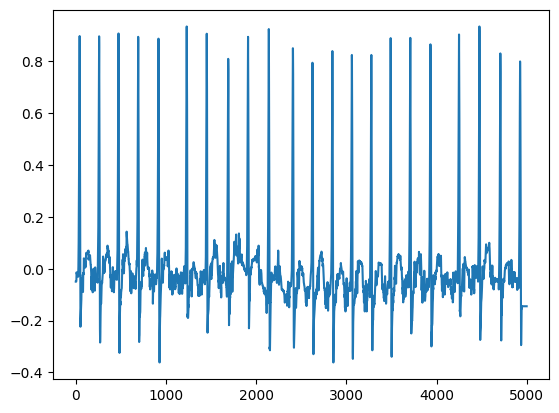

In [26]:
# 심방세동이 있는 그래프 
plt.plot(df_ptb_lead1[17])
plt.show()

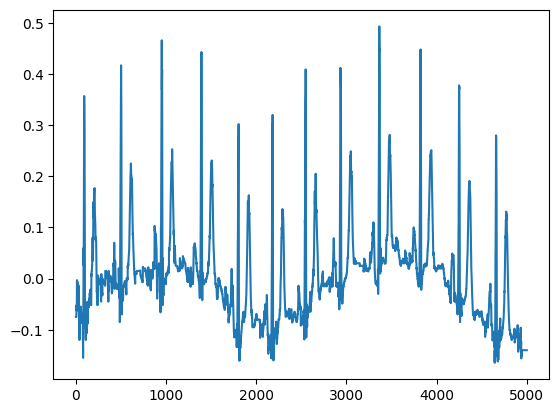

In [35]:
# 심방세동이 없는 그래프 
plt.plot(df_ptb_lead1[20])
plt.show()

# 3. model 생성 및 학습 
- 라이브러리는 pytorch를 사용 
- 3-1 모델 셀렉팅 
- 3-2 파이토치 데이터 로더 생성 
- 3-3 모델 정의 
- 3-4 학습 

## 3-1 모델 셀렉팅 

- cnn:
- rnn:
- lstm:


## 3-2 파이토치 데이터 로더

In [19]:
#딥러닝 관련 파이토치 임포트

import torch
import torch.nn as nn
import torch.nn.functional as F
 
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더
from torch.utils.data import Dataset # 데이터 셋

In [20]:
# 커스텀 데이터 셋 정의 

class CustomDataset(Dataset):
    def __init__(self,X,y): # 데이터 셋 불러오기
        self.train=X
        self.label=y['label']

    def __len__(self): 
        return len(self.label)

    def __getitem__(self, idx): # 전체 x와 y 데이터 중에 해당 idx번째의 데이터를 가져옵니다.
        label = self.label.iloc[idx]
        return label

In [21]:
# 커스텀 데이터 셋 만들기 
coustomDataset=CustomDataset(df_ptb_lead1,df_ptb)

In [22]:
coustomDataset

In [25]:
#데이터 분할 
train_size = int(0.8 * len(coustomDataset))

test_size = len(coustomDataset) - train_size


train_dataset, test_dataset = torch.utils.data.random_split(coustomDataset, [train_size, test_size])


In [31]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64,shuffle = True)
validation_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64,shuffle = False)



## 3-3 모델 정의 

In [28]:
# 클래스 정의 하기 
class cnn_1d(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
            torch.nn.ReLU()
           
            
        )
   
        self.layer2= torch.nn.Sequential(
            nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
            torch.nn.ReLU()
            
        )
        self.fc=
        

    def forward(self, x): # forward함수 만들기 (실행)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

AttributeError: 'DataLoader' object has no attribute 'shape'

# 4. model  평가 및 고도화
- 하이퍼 파라미터 튜닝
- 드롭아웃
- 정규화 
- 리샘플링
- optimizer(최적화)
